<a href="https://colab.research.google.com/github/tariqzahratahdi/DataScience/blob/main/course_seaborn_datasets_fr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction à Seaborn

Seaborn est une interface de haut niveau permettant de créer des graphiques statistiques avec Matplotlib. Son objectif est de placer la visualisation au cœur de l'exploration et de la compréhension d'ensembles de données complexes.

Elle s'appuie sur Matplotlib et s'intègre étroitement aux structures de données Pandas.

# Présentation des fonctions de tracé de Seaborn

Seaborn est organisé en trois catégories de tracés, comme indiqué ci-dessous:

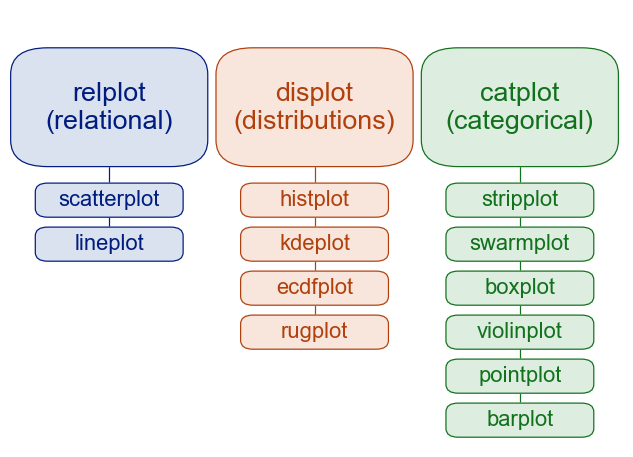

Les fonctions de Seaborn sont organisées autour des différents types de données et des questions que nous posons généralement en science des données :
* la fonction `relpolt` trace les relations entre différentes variables (continues),
* la fonction `displot` trace les distributions de données (telles que les histogrammes),
* la fonction `catplot`.

# Datasets

En tant que bibliothèque de visualisation de données, Seaborn nécessite que vous lui fournissiez des données.

Seaborn prend en charge plusieurs formats de datasets, et la plupart des fonctions acceptent les données représentées par des objets des bibliothèques Pandas ou NumPy, ainsi que par des types Python intégrés comme les listes et les dictionnaires.

Seaborn propose une gamme de datasets intégrés, parfaits pour mettre en pratique et démontrer divers concepts de science des données.

Un dataset est un dataframe Pandas.

Liste des datasets disponibles

La fonction `get_datasets_names()` permet d'obtenir la liste des datasets disponibles.

In [ ]:
# import seaborn
import seaborn as sns

# get list of built-in datasets in seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

# Charger un dataset

Nous chargeons un dataset à l'aide de la fonction `load_dataset()`.

In [ ]:
# load dataframe
iris = sns.load_dataset('iris')

# return first rows of dataframe
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Long-form vs. wide-form data

La plupart des fonctions de représentation graphique de Seaborn sont orientées vers les vecteurs de données.

Lors du tracé de `x` par rapport à `y`, chaque variable doit être un vecteur.

Seaborn accepte les datasets comportant plusieurs vecteurs organisés sous forme de tableau.

Il existe une distinction fondamentale entre les tableaux de données long-form et wide-form, et Seaborn les traite différemment.

## Long-form data

Un tableau de données détaillé présente les caractéristiques suivantes:

* Chaque variable est une colonne.
* Chaque observation est une ligne.

À titre d'exemple simple, prenons le dataset `flights`, qui enregistre le nombre de passagers aériens ayant pris l'avion chaque mois entre 1949 et 1960.

Ce dataset comporte trois variables (`year`, `month` et `passengers`).

In [ ]:
# loading the dataframe
flights = sns.load_dataset("flights")

# returning the first rows of the dataframe
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Avec long-form data, les colonnes du tableau se voient attribuer un rôle dans le graphique en les attribuant explicitement à l'une des variables.

Par exemple, un graphique mensuel du nombre de passagers par an ressemble à ceci:

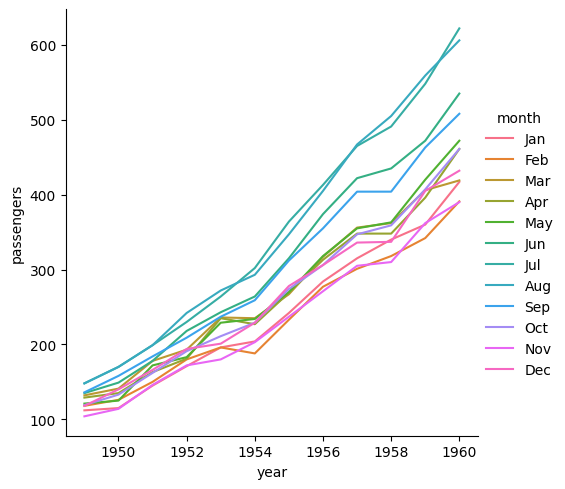

In [ ]:
# set plot
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

## Wide-form data

Pour les datasets simples, il est souvent plus intuitif d'envisager les données comme elles pourraient être visualisées dans une feuille de calcul, où les colonnes et les lignes contiennent les niveaux de différentes variables.

Par exemple, nous pouvons convertir l'ensemble de données sur les vols en une organisation wide-form en le faisant pivoter afin que chaque colonne contienne les séries chronologiques de chaque mois sur plusieurs années.

In [ ]:
# pivot dataframe
flights_wide = flights.pivot(index="year", columns="month", values="passengers")

# return first rows of dataframe
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


Nous avons ici les trois mêmes variables, mais elles sont organisées différemment.

Les variables de ce dataset sont liées aux dimensions du tableau, plutôt qu'à des champs nommés.

Chaque observation est définie par la valeur d'une cellule du tableau et par les coordonnées de cette cellule par rapport aux indices de ligne et de colonne.

Remarque: Seaborn traite l'argument des données comme wide-form lorsque ni `x` ni `y` ne sont attribués.

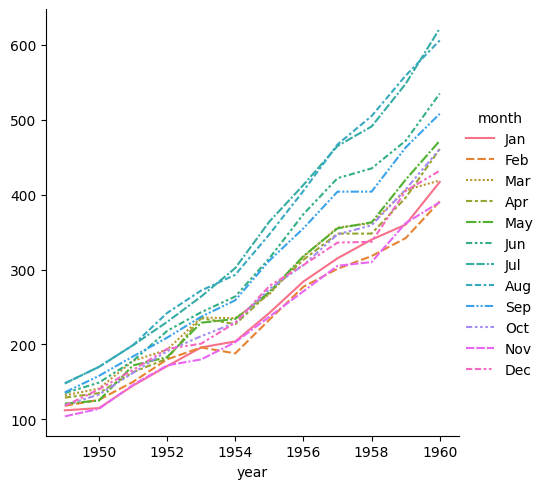

In [ ]:
# set plot
sns.relplot(data=flights_wide, kind="line")

En résumé, nous pouvons considérer les datasets long-form et wide-form comme ressemblant à ceci :

<br><br>
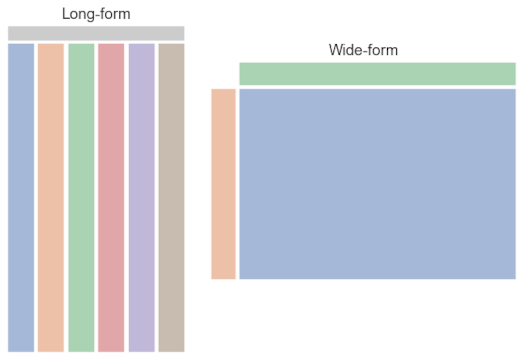